<a href="https://colab.research.google.com/github/sc7-cloud/TFG---GOOGLE-COLAB-C-DIGOS-/blob/main/AN%C3%81LISIS_DE_NEGOCIO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


df_artistas = pd.read_excel('/content/Artistas.xlsx')
df_canciones = pd.read_excel('/content/CancionesNuevo.xlsx')


print("Primeras filas de la base de datos de Artistas:")
print(df_artistas.head())
print("\nPrimeras filas de la base de datos de Canciones:")
print(df_canciones.head())


df_combinado = pd.merge(df_artistas, df_canciones, on="Artista ID", how="inner")


print("\nPrimeras filas del DataFrame combinado:")
print(df_combinado.head())


df_combinado['Artista ID'] = df_combinado['Artista ID'].astype('category')



print("\nPrimeras filas después de convertir los identificadores a categóricos:")
print(df_combinado[['Artista ID']].dtypes)


Primeras filas de la base de datos de Artistas:
   Chartmetric ID         Artista  Artista ID            País          Región  \
0         1404155      Lola Young        1001     Reino Unido  Western Europe   
1          470449   Playboi Carti        1002  Estados Unidos   North America   
2            2007            Akon        1003         Senegal  Western Africa   
3            3544  Ellie Goulding        1004     Reino Unido  Western Europe   
4         1202489          GIVĒON        1005  Estados Unidos   North America   

      Continente      Solista/Grupo     Género 1    Género 2   Género 3  ...  \
0         Europe              Grupo          R&B    Folk Pop      Indie  ...   
1  North America  Artistas solistas  Hip-Hop/Rap     Pop Rap   Rage Rap  ...   
2         Africa  Artistas solistas  Hip-Hop/Rap         Pop   R&B/Soul  ...   
3         Europe  Artistas solistas   Electronic  Electropop  Indie Pop  ...   
4  North America  Artistas solistas          R&B         Pop   Ne

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


def normalizar_y_convertir_a_positivos(df, columnas_a_normalizar):

    scaler = StandardScaler()


    df[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])


    df[columnas_a_normalizar] = df[columnas_a_normalizar].abs()


    print("\nPrimeras filas después de normalizar y hacer positivos los valores negativos:")
    print(df[columnas_a_normalizar].head())


columnas_a_normalizar = ['Vistas en TikTok', 'Me gusta en TikTok', 'Tasa de Participación en TikTok',
                         'Bailabilidad', 'Energía', 'Acústica', 'Instrumentalidad', 'Viveza',
                         'Valencia', 'Tempo', 'Compás', 'Nivel Hablado', 'Tono', 'Volumen']


normalizar_y_convertir_a_positivos(df_combinado, columnas_a_normalizar)




Primeras filas después de normalizar y hacer positivos los valores negativos:
   Vistas en TikTok  Me gusta en TikTok  Tasa de Participación en TikTok  \
0          0.678442            1.463501                         0.020565   
1          0.678442            1.463501                         0.020565   
2          0.678442            1.463501                         0.020565   
3          0.678442            1.463501                         0.020565   
4          0.678442            1.463501                         0.020565   

   Bailabilidad   Energía  Acústica  Instrumentalidad    Viveza  Valencia  \
0      0.907148  0.848336  0.740469          0.067481  0.458733  0.189921   
1      0.907148  0.848336  0.740469          0.067481  0.458733  0.189921   
2      0.907148  0.848336  0.740469          0.067481  0.458733  0.189921   
3      0.907148  0.848336  0.740469          0.067481  0.458733  0.189921   
4      0.907148  0.848336  0.740469          0.067481  0.458733  0.189921   

 

<ipython-input-12-6f8d9a5b547e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importances, palette='viridis')


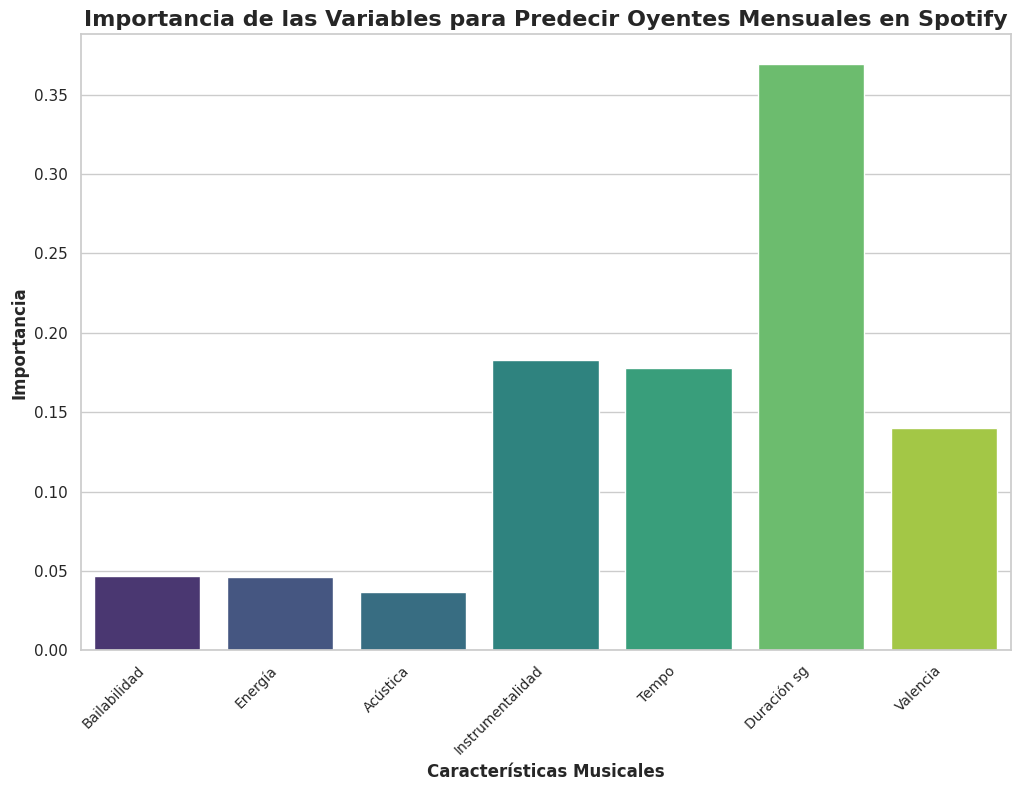

<ipython-input-12-6f8d9a5b547e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importances, palette='viridis')


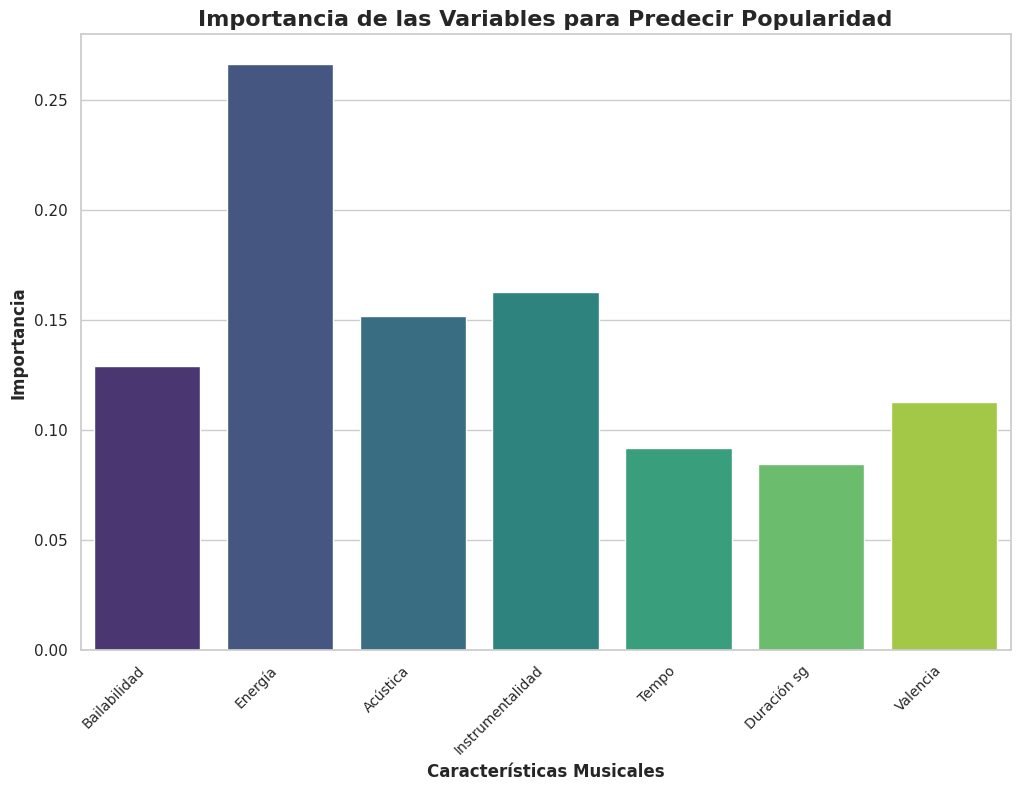

<ipython-input-12-6f8d9a5b547e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importances, palette='viridis')


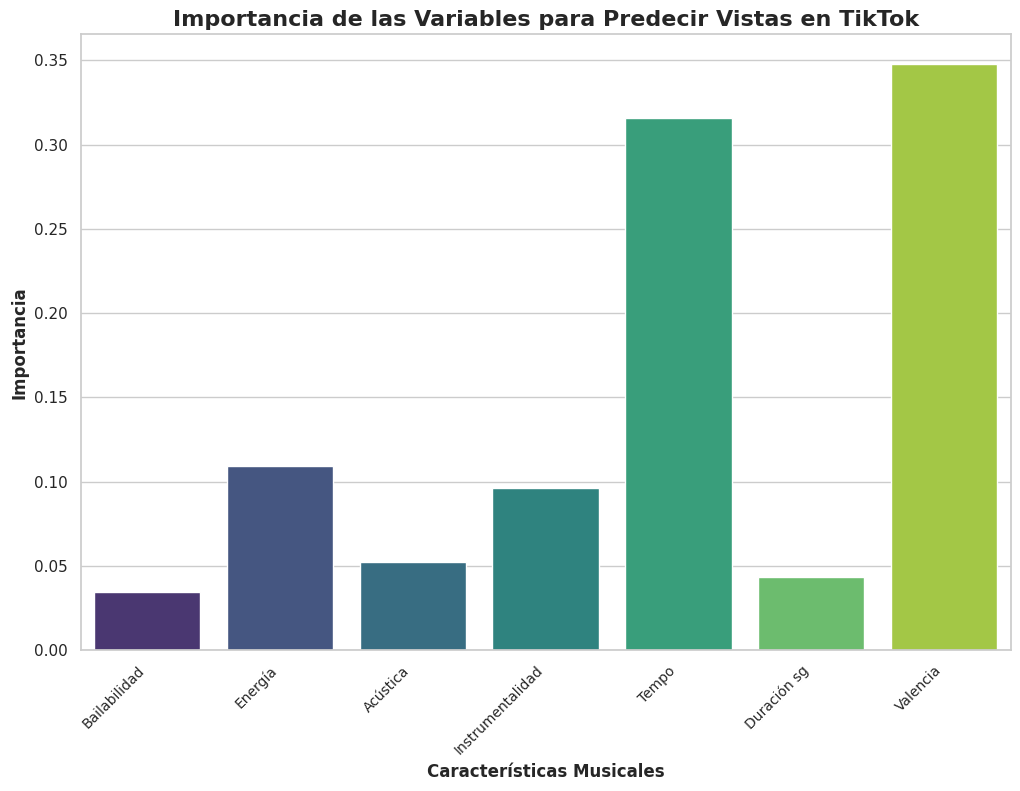

<ipython-input-12-6f8d9a5b547e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=importances, palette='viridis')


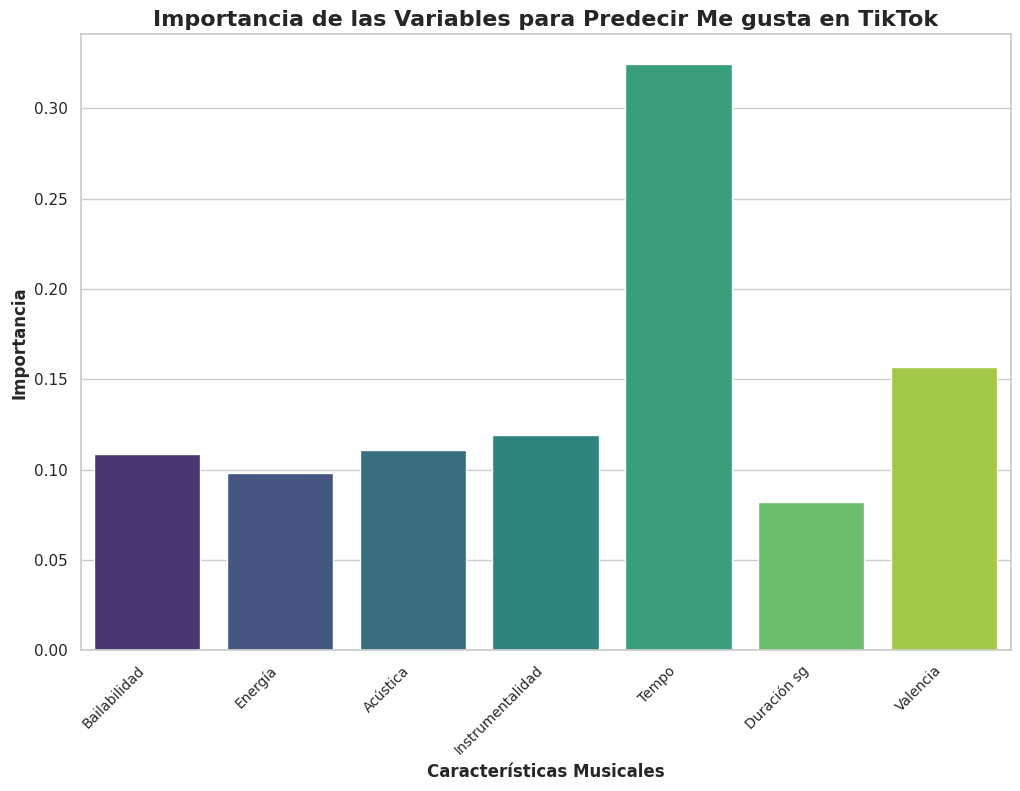

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


def importancia_variables(modelo, X, y, variable_nombre):

    modelo.fit(X, y)


    importances = modelo.feature_importances_


    plt.figure(figsize=(12, 8))
    sns.barplot(x=X.columns, y=importances, palette='viridis')
    plt.title(f"Importancia de las Variables para Predecir {variable_nombre}", fontsize=16, fontweight='bold')
    plt.xlabel("Características Musicales", fontsize=12, fontweight='bold')
    plt.ylabel("Importancia", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()


X = df_combinado[['Bailabilidad', 'Energía', 'Acústica', 'Instrumentalidad', 'Tempo', 'Duración sg', 'Valencia']]
y_spotify = df_combinado['Oyentes mensuales en Spotify']
y_popularidad = df_combinado['Popularidad']
y_tiktok_vistas = df_combinado['Vistas en TikTok']
y_tiktok_megusta = df_combinado['Me gusta en TikTok']


modelo_spotify = RandomForestRegressor(n_estimators=100, random_state=42)


importancia_variables(modelo_spotify, X, y_spotify, "Oyentes Mensuales en Spotify")


modelo_popularidad = RandomForestRegressor(n_estimators=100, random_state=42)


importancia_variables(modelo_popularidad, X, y_popularidad, "Popularidad")


modelo_tiktok_vistas = RandomForestRegressor(n_estimators=100, random_state=42)


importancia_variables(modelo_tiktok_vistas, X, y_tiktok_vistas, "Vistas en TikTok")


modelo_tiktok_megusta = RandomForestRegressor(n_estimators=100, random_state=42)


importancia_variables(modelo_tiktok_megusta, X, y_tiktok_megusta, "Me gusta en TikTok")



Generando matriz de correlación entre las características musicales y métricas de TikTok...


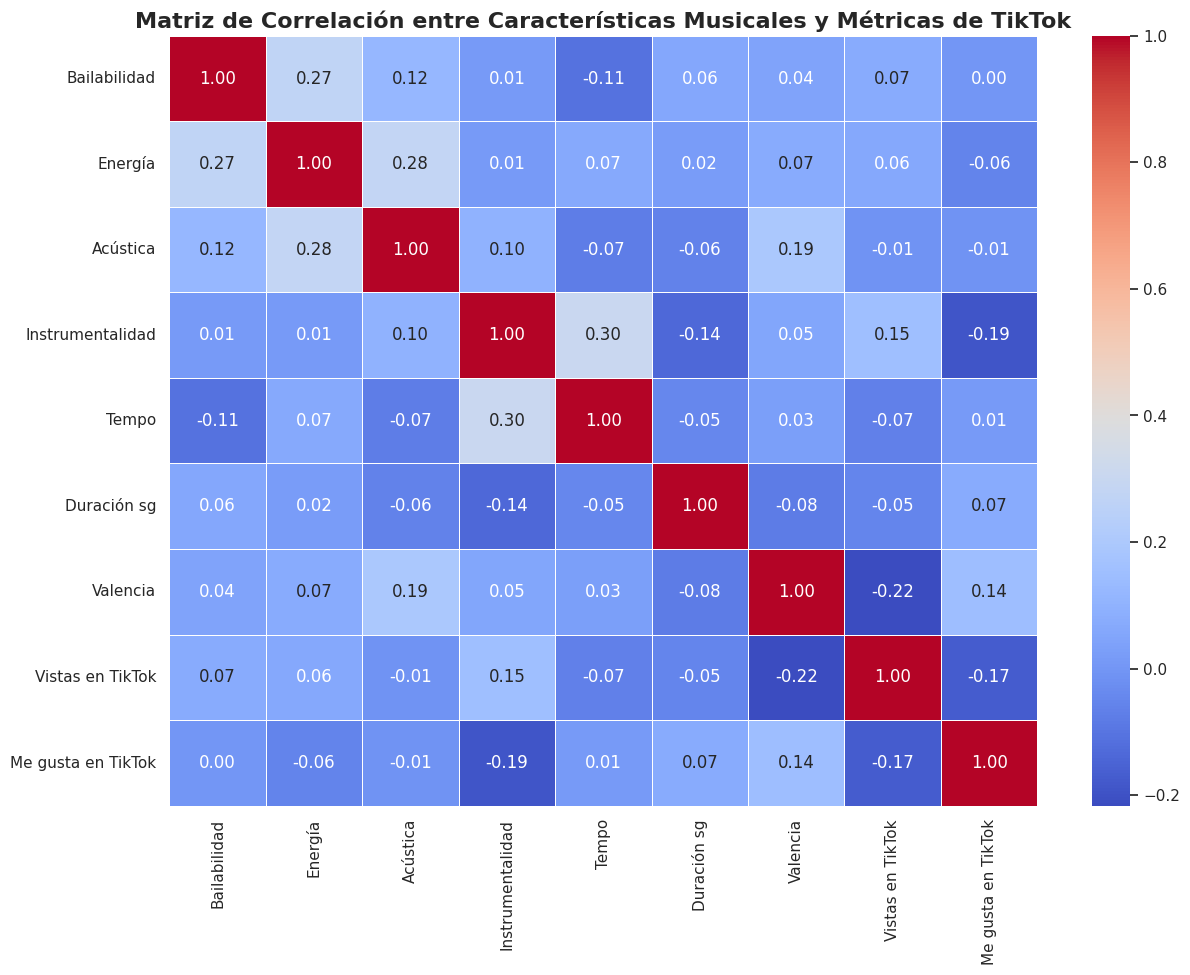

In [ ]:

def grafica_correlacion_tiktok():
    print("\nGenerando matriz de correlación entre las características musicales y métricas de TikTok...")

    correlacion_df = df_combinado[['Bailabilidad', 'Energía', 'Acústica', 'Instrumentalidad', 'Tempo', 'Duración sg', 'Valencia',
                                   'Vistas en TikTok', 'Me gusta en TikTok']]


    corr_matrix = correlacion_df.corr()


    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 12})
    plt.title("Matriz de Correlación entre Características Musicales y Métricas de TikTok", fontsize=16, fontweight='bold')
    plt.show()


grafica_correlacion_tiktok()



Generando gráfico de Bailabilidad vs Vistas en TikTok...


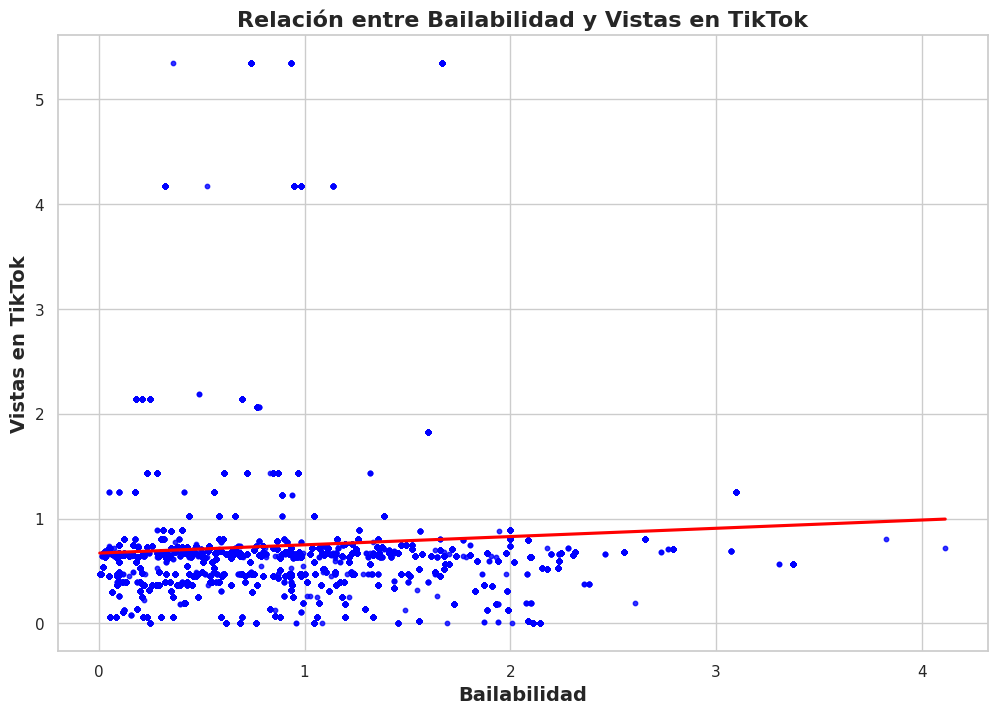


Generando gráfico de Energía vs Vistas en TikTok...


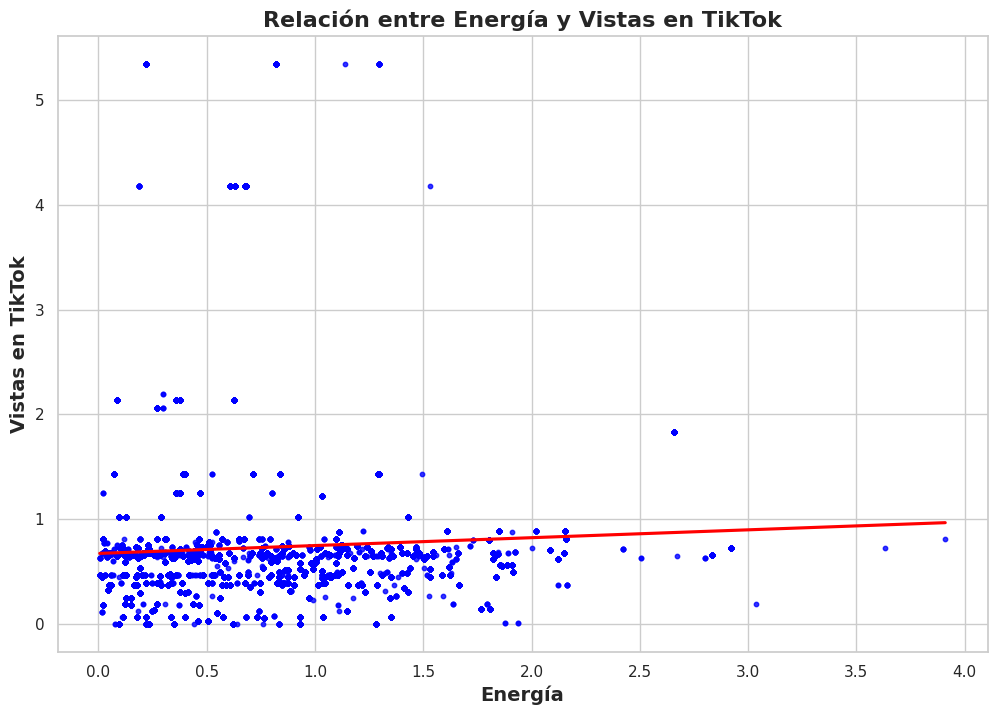


Generando gráfico de Acústica vs Vistas en TikTok...


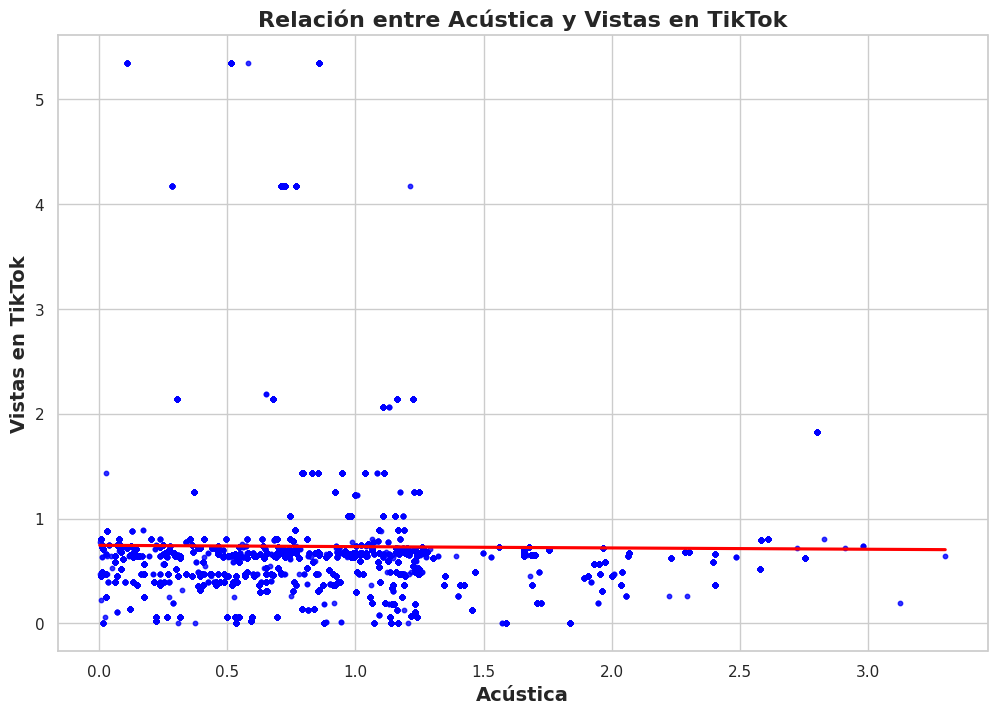


Generando gráfico de Bailabilidad vs Me gusta en TikTok...


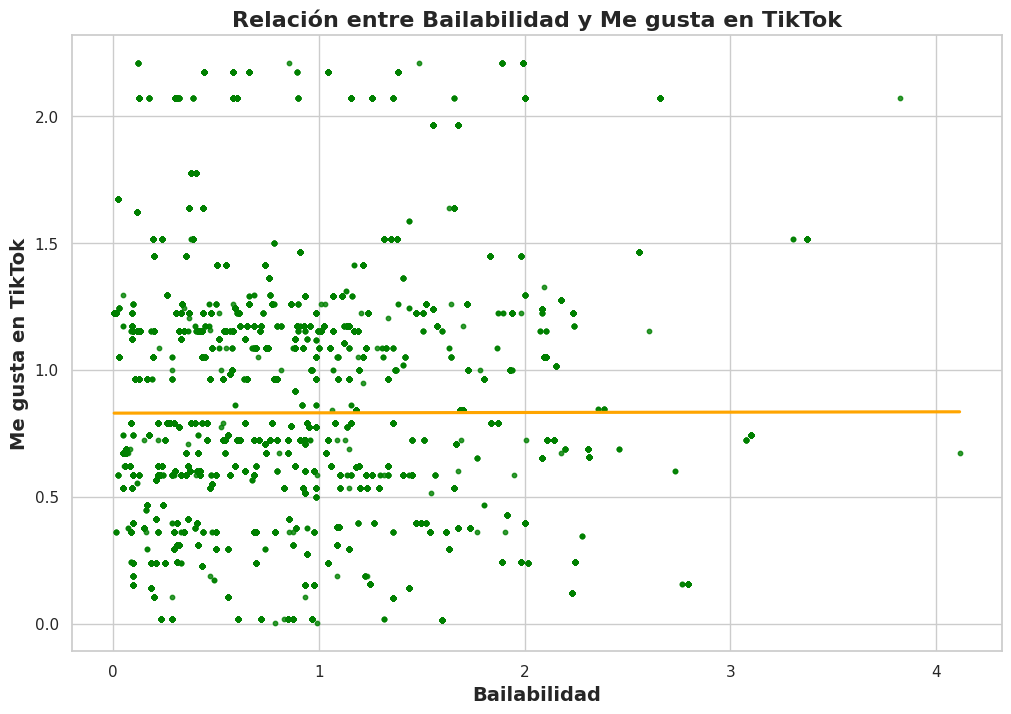


Generando gráfico de Energía vs Me gusta en TikTok...


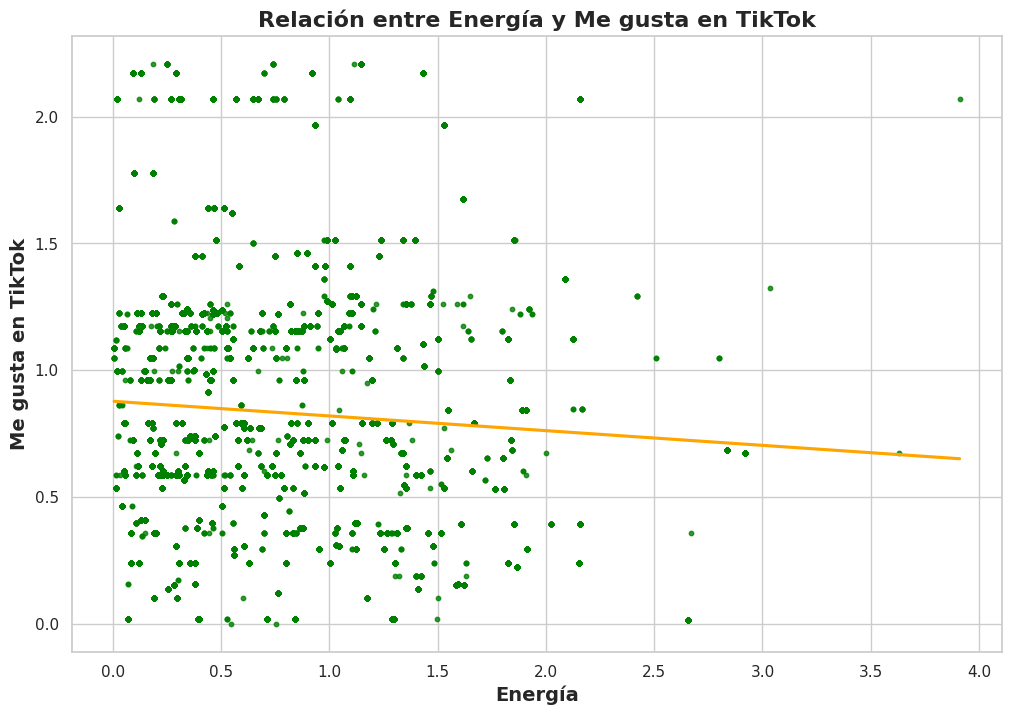


Generando gráfico de Acústica vs Me gusta en TikTok...


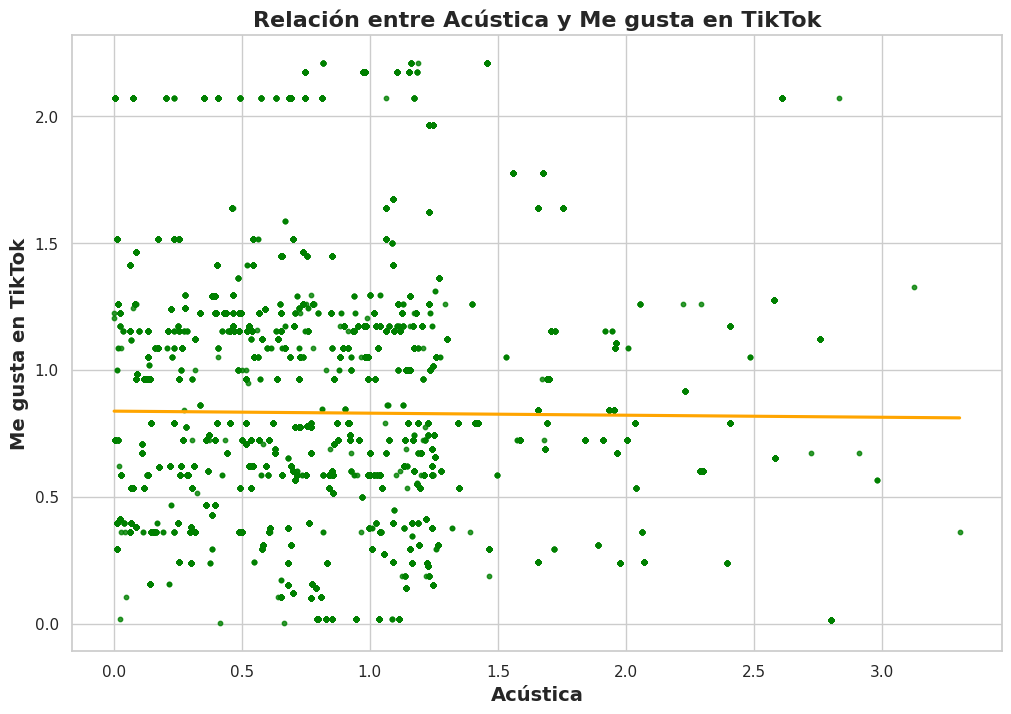

In [ ]:

def grafica_dispercion_vistas(variable, variable_nombre):
    print(f"\nGenerando gráfico de {variable_nombre} vs Vistas en TikTok...")

    if variable in df_combinado.columns and 'Vistas en TikTok' in df_combinado.columns:

        plt.figure(figsize=(12, 8))
        sns.regplot(x=variable, y='Vistas en TikTok', data=df_combinado, scatter_kws={'color':'blue', 's':10}, line_kws={'color':'red'}, ci=None)


        plt.title(f'Relación entre {variable_nombre} y Vistas en TikTok', fontsize=16, fontweight='bold')
        plt.xlabel(variable_nombre, fontsize=14, fontweight='bold')
        plt.ylabel('Vistas en TikTok', fontsize=14, fontweight='bold')


        plt.show()


grafica_dispercion_vistas('Bailabilidad', 'Bailabilidad')


grafica_dispercion_vistas('Energía', 'Energía')


grafica_dispercion_vistas('Acústica', 'Acústica')


def grafica_dispercion_me_gusta(variable, variable_nombre):
    print(f"\nGenerando gráfico de {variable_nombre} vs Me gusta en TikTok...")

    if variable in df_combinado.columns and 'Me gusta en TikTok' in df_combinado.columns:

        plt.figure(figsize=(12, 8))
        sns.regplot(x=variable, y='Me gusta en TikTok', data=df_combinado, scatter_kws={'color':'green', 's':10}, line_kws={'color':'orange'}, ci=None)


        plt.title(f'Relación entre {variable_nombre} y Me gusta en TikTok', fontsize=16, fontweight='bold')
        plt.xlabel(variable_nombre, fontsize=14, fontweight='bold')
        plt.ylabel('Me gusta en TikTok', fontsize=14, fontweight='bold')


        plt.show()


grafica_dispercion_me_gusta('Bailabilidad', 'Bailabilidad')


grafica_dispercion_me_gusta('Energía', 'Energía')


grafica_dispercion_me_gusta('Acústica', 'Acústica')


In [ ]:

df_combinado['fecha dato registrado'] = pd.to_datetime(df_combinado['fecha dato registrado'], errors='coerce')


df_combinado['Mes'] = df_combinado['fecha dato registrado'].dt.month
df_combinado['Año'] = df_combinado['fecha dato registrado'].dt.year


df_segmentado = df_combinado.groupby(['País_y', 'Año', 'Mes']).agg({
    'Vistas en TikTok': 'mean',
    'Me gusta en TikTok': 'mean',
    'Oyentes mensuales en Spotify': 'mean',
    'Popularidad': 'mean'
}).reset_index()


print("\nPrimeras filas del DataFrame segmentado por país y mes:")
print(df_segmentado.head())



Primeras filas del DataFrame segmentado por país y mes:
  País_y   Año  Mes  Vistas en TikTok  Me gusta en TikTok  \
0     AR  2024    3          0.843597            0.516680   
1     AR  2024    4          0.789473            0.584313   
2     AR  2024    5          0.956641            0.361366   
3     AR  2024    6          1.022246            0.318044   
4     AR  2024    7          0.988193            0.485671   

   Oyentes mensuales en Spotify  Popularidad  
0                  2.400866e+07    82.191304  
1                  1.604475e+07    74.498328  
2                  2.031954e+07    80.386364  
3                  2.705393e+07    82.427481  
4                  2.609276e+07    84.419580  



Generando gráfico de tendencias de Vistas en TikTok por País y Mes...


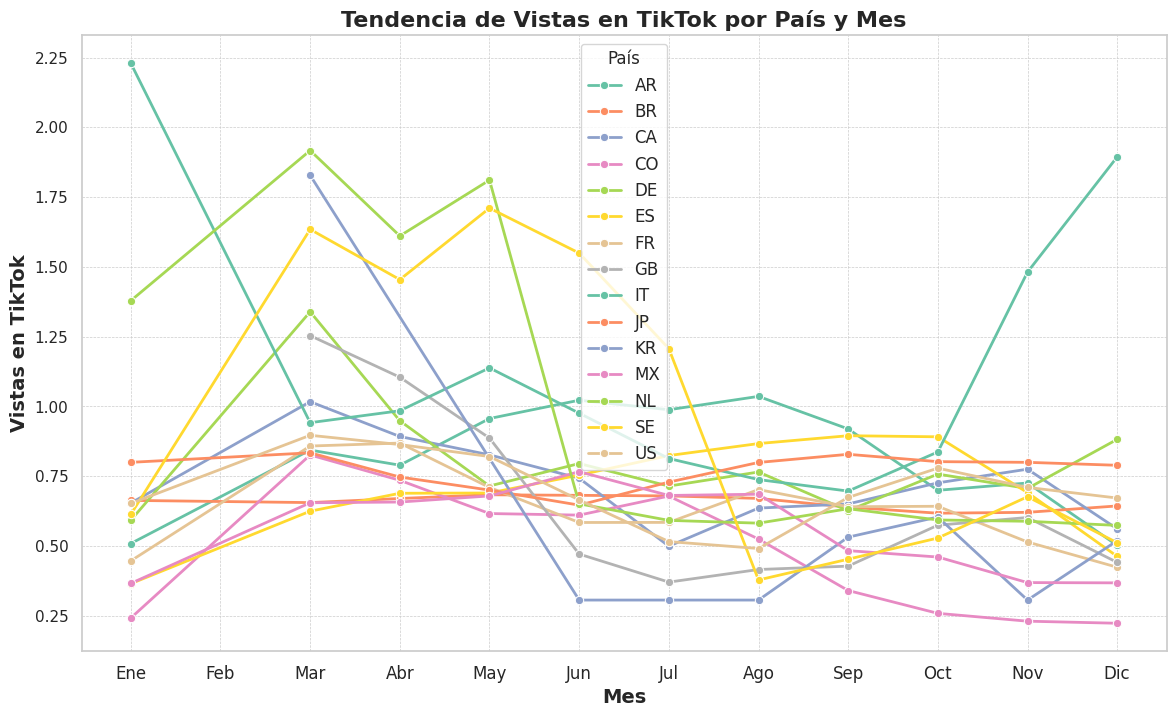


Generando gráfico de tendencias de Me gusta en TikTok por País y Mes...


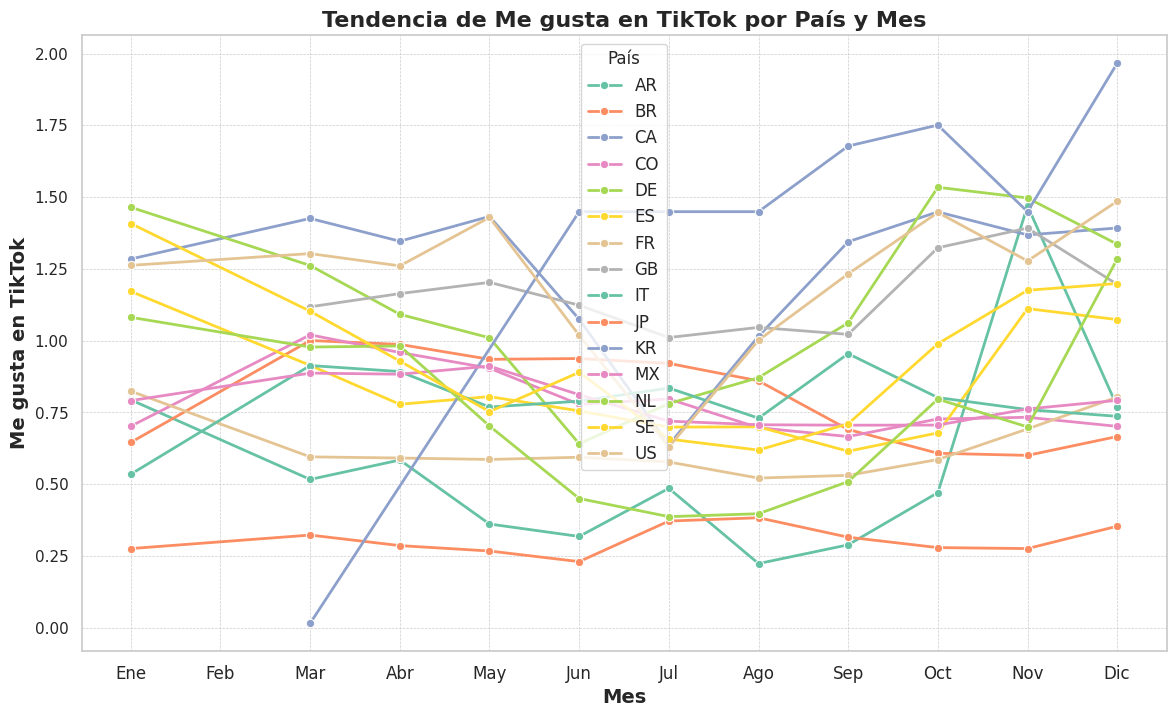

In [ ]:

def grafica_tendencias_tiktok():
    print("\nGenerando gráfico de tendencias de Vistas en TikTok por País y Mes...")

    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_segmentado, x='Mes', y='Vistas en TikTok', hue='País_y', marker='o', palette='Set2', lw=2)

    plt.title('Tendencia de Vistas en TikTok por País y Mes', fontsize=16, fontweight='bold')
    plt.xlabel('Mes', fontsize=14, fontweight='bold')
    plt.ylabel('Vistas en TikTok', fontsize=14, fontweight='bold')
    plt.xticks(range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], fontsize=12)
    plt.legend(title="País", fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()


grafica_tendencias_tiktok()


def grafica_tendencias_me_gusta():
    print("\nGenerando gráfico de tendencias de Me gusta en TikTok por País y Mes...")

    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_segmentado, x='Mes', y='Me gusta en TikTok', hue='País_y', marker='o', palette='Set2', lw=2)

    plt.title('Tendencia de Me gusta en TikTok por País y Mes', fontsize=16, fontweight='bold')
    plt.xlabel('Mes', fontsize=14, fontweight='bold')
    plt.ylabel('Me gusta en TikTok', fontsize=14, fontweight='bold')
    plt.xticks(range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], fontsize=12)
    plt.legend(title="País", fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()


grafica_tendencias_me_gusta()


In [ ]:
from sklearn.linear_model import LinearRegression


def regresion_lineal(variable, variable_nombre, X, y):
    print(f"\nGenerando modelo de regresión lineal para {variable_nombre}...")


    modelo = LinearRegression()
    modelo.fit(X, y)


    coeficientes = modelo.coef_


    for i, col in enumerate(X.columns):
        print(f"Coeficiente de {col} con respecto a {variable_nombre}: {coeficientes[i]:.4f}")


    print(f"Intercepto del modelo de regresión para {variable_nombre}: {modelo.intercept_:.4f}")


X = df_combinado[['Bailabilidad', 'Energía', 'Acústica', 'Instrumentalidad', 'Tempo', 'Duración sg', 'Valencia']]


regresion_lineal('Vistas en TikTok', 'Vistas en TikTok', X, df_combinado['Vistas en TikTok'])
regresion_lineal('Me gusta en TikTok', 'Me gusta en TikTok', X, df_combinado['Me gusta en TikTok'])
regresion_lineal('Oyentes mensuales en Spotify', 'Oyentes mensuales en Spotify', X, df_combinado['Oyentes mensuales en Spotify'])
regresion_lineal('Popularidad', 'Popularidad', X, df_combinado['Popularidad'])



Generando modelo de regresión lineal para Vistas en TikTok...
Coeficiente de Bailabilidad con respecto a Vistas en TikTok: 0.0542
Coeficiente de Energía con respecto a Vistas en TikTok: 0.0963
Coeficiente de Acústica con respecto a Vistas en TikTok: -0.0330
Coeficiente de Instrumentalidad con respecto a Vistas en TikTok: 0.1377
Coeficiente de Tempo con respecto a Vistas en TikTok: -0.1202
Coeficiente de Duración sg con respecto a Vistas en TikTok: -0.0010
Coeficiente de Valencia con respecto a Vistas en TikTok: -0.2719
Intercepto del modelo de regresión para Vistas en TikTok: 1.0960

Generando modelo de regresión lineal para Me gusta en TikTok...
Coeficiente de Bailabilidad con respecto a Me gusta en TikTok: 0.0231
Coeficiente de Energía con respecto a Me gusta en TikTok: -0.0836
Coeficiente de Acústica con respecto a Me gusta en TikTok: 0.0150
Coeficiente de Instrumentalidad con respecto a Me gusta en TikTok: -0.1270
Coeficiente de Tempo con respecto a Me gusta en TikTok: 0.0681
Coef